In [121]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow import keras

import matplotlib.pyplot as plt
import cv2

In [122]:
model = tf.keras.models.load_model('test_model.keras')

In [123]:
numbers = np.zeros((10,28,28))
labels = [0,1,2,3,4,5,6,7,8,9]
for i in range(10):
    img = cv2.imread(f"{i}.jpg",cv2.IMREAD_GRAYSCALE) #Read the image as a grayscale
    img = cv2.resize(img,(28,28), interpolation=cv2.INTER_AREA)
    img = (255-img)/255.0
    numbers[i]=img


In [124]:
def show_img(i, data, labels):
    plt.imshow((data)[i], cmap=plt.cm.binary)
    
    predA = (model.predict(data)[i])
    pred = np.argmax(predA)
    
    if (pred == labels[i]):
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel(f"Pred:{pred} (Actual:{labels[i]})", color=color)

In [125]:
def plot_graph(num_rows, num_cols, data, labels):
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    show_img(i,data,labels)
  plt.tight_layout()
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


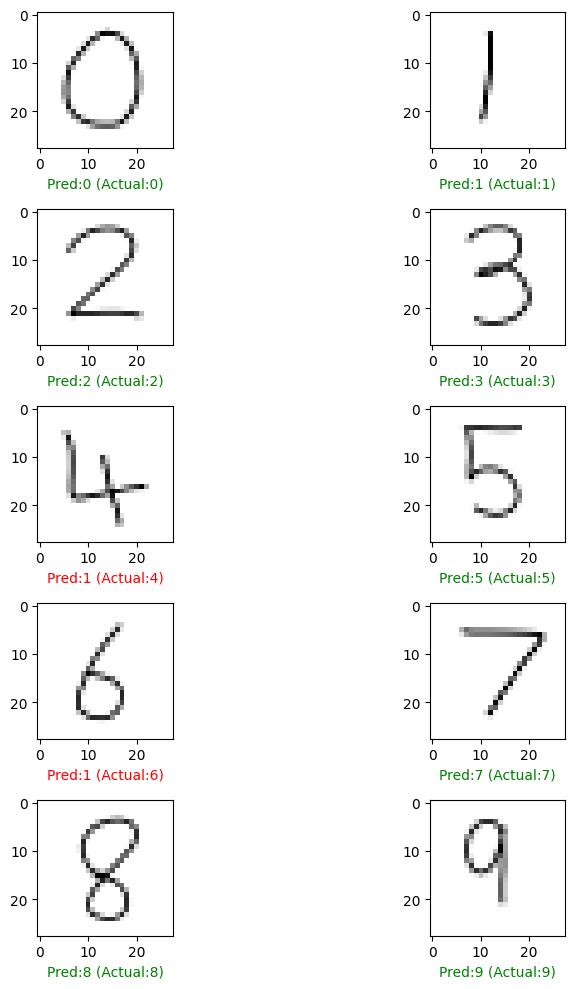

In [126]:
plot_graph(5,2,numbers,labels)

In [180]:
def predict(num):
    num = cv2.resize(num,(28,28), interpolation=cv2.INTER_AREA)
    if (np.mean(num) >= 123):
        num = (255-num)
    
    num = num/255.0

    plt.imshow(num, cmap=plt.cm.binary)
    
    num = np.reshape(num,(1,28,28))
    
    predA = (model.predict(num))
    pred = np.argmax(predA)
    certainty = round((np.max(predA)*100),2)
    print (certainty)
    
    plt.xlabel(f"Prediction: {pred}, Certainty: {format(certainty, '.2f')}")
    
    return(pred,certainty)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
92.02


(np.int64(1), np.float32(92.02))

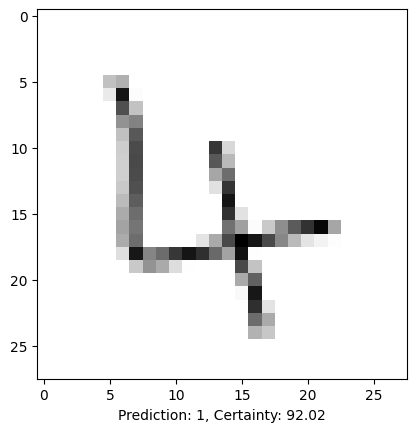

In [184]:
num = cv2.imread("4.jpg",cv2.IMREAD_GRAYSCALE) #Read the image as a grayscale
predict(num)